In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.preprocessing import image

In [2]:
img = cv2.imread('textTextImg1.PNG')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

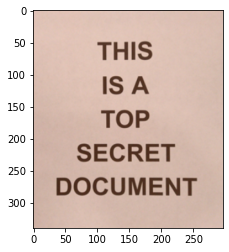

In [3]:
plt.imshow(img)

In [7]:
croped_dir_path = "cro/"
os.mkdir(croped_dir_path)
idx = 0
oth = 0
for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
    if h != img.shape[0] and w != img.shape[1]:
      idx += 1
      new_img = img[y:y+h, x:x+w]
      cv2.imwrite(croped_dir_path +'/'+str(x) + '_' + str(y) + '_' + str(w) + '_' + str(h) + '.png', new_img)

# Downloading model

In [4]:
import urllib.request
urllib.request.urlretrieve("https://github.com/preyash2047/preyash2047.github.io/raw/master/home/keras_model/selective_data_model.h5",'model.h5')

('model.h5', <http.client.HTTPMessage at 0x7f55efde6c88>)

In [5]:
loaded_model = tf.keras.models.load_model('model.h5')
loaded_model.layers[0].input_shape #(None, 160, 160, 3)
abcd = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"];

# Image with predicted *value*

### getting output in text only

In [13]:
output_text = ""
for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
    if h != img.shape[0] and w != img.shape[1]:
      new_img = img[y:y+h, x:x+w]
      cv2.imwrite(str(x) + '_' + str(y) + '_' + str(w) + '_' + str(h) + '.png', new_img)
      test_image = image.load_img(str(x) + '_' + str(y) + '_' + str(w) + '_' + str(h) + '.png', target_size = (64, 64))
      test_image = image.img_to_array(test_image)
      test_image = np.expand_dims(test_image, axis = 0)
      result = loaded_model.predict(test_image)
      try:
        output_text += abcd[list(result[0]).index(1)]
        #print(abcd[list(result[0]).index(1)])
      except:
        print("")
      os.remove(str(x) + '_' + str(y) + '_' + str(w) + '_' + str(h) + '.png')

output_text

'THEBUOOLOLTEELEOOPLOLTAOFHTO'

In [12]:
len(output_text)

28

### getting output in image

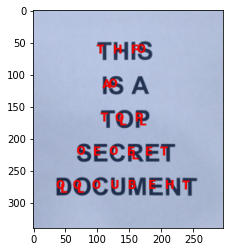

In [28]:
from PIL import Image, ImageDraw, ImageFont
base = Image.open("/content/textTextImg1.PNG").convert("RGBA")

# make a blank image for the text, initialized to transparent text color
txt = Image.new("RGBA", base.size)
# get a drawing context
d = ImageDraw.Draw(txt)

for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
    if h != img.shape[0] and w != img.shape[1]:
      new_img = img[y:y+h, x:x+w]
      cv2.imwrite(str(x) + '_' + str(y) + '_' + str(w) + '_' + str(h) + '.png', new_img)

      test_image = image.load_img(str(x) + '_' + str(y) + '_' + str(w) + '_' + str(h) + '.png', target_size = (64, 64))
      test_image = image.img_to_array(test_image)
      test_image = np.expand_dims(test_image, axis = 0)
      result = loaded_model.predict(test_image)
      try:
        d.text((x,y), abcd[list(result[0]).index(1)], fill="Red",  font=ImageFont.truetype("/content/Roboto-Black.ttf",20))
      except:
        print("")
      os.remove(str(x) + '_' + str(y) + '_' + str(w) + '_' + str(h) + '.png')

out = Image.alpha_composite(base, txt)

plt.imshow(out)

### getting output in blank page

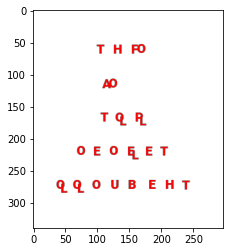

In [29]:
plt.imshow(txt)